In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pickle
import warnings
# Filter and ignore the specific warning
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
hotel_data = pd.read_csv('C:\\Users\\kundu\\Downloads\\hotel_bookings_data.csv')


In [3]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_data['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [5]:
#overview of data
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are null values in the data in two columns agent and company
There are 31 columns in the data

In [6]:
#dropping null value columns
hotel_data.drop(['company','agent'],axis=1,inplace=True)
hotel_data=hotel_data.dropna()

In [7]:
#statistical view of the data
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
#checking the scenario where adults children and babies are zero
filter = (hotel_data.children == 0) & (hotel_data.adults == 0) & (hotel_data.babies == 0)
hotel_data[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


there are 180 rows which satisfies this condition

In [9]:
#deleting the data with the above condition
hotel_data = hotel_data[~filter]

In [10]:
#checking integer and object columns
int_columns = hotel_data.select_dtypes(include=['int','float']).columns
print('number of integer columns:',len(int_columns))
print(int_columns)

number of integer columns: 18
Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


# Exploratory Data Analysis

In [11]:
target_data_summary = hotel_data.groupby(by ='is_canceled').sum()
target_data_summary=target_data_summary.reset_index()
target_data_summary

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,5998438,150384529,2020270,1181618,69369,183855,136965,7680.0,776,3201,1167,14547,21643,119094,7488360.47,7351,53380
1,1,6396921,88989830,1204988,694399,40847,113074,83994,4710.0,169,550,9187,1079,4338,157618,4637738.89,0,14506


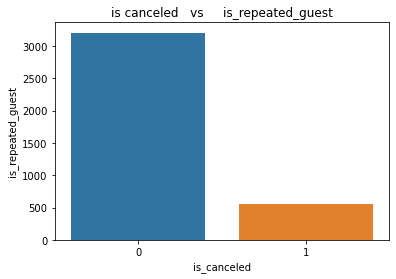

In [12]:
sns.barplot(x='is_canceled',y='is_repeated_guest',data=target_data_summary)
plt.title('is canceled   vs     is_repeated_guest')
plt.show()


Hotel booking cancellation count is less for repeated guests compared rare guests

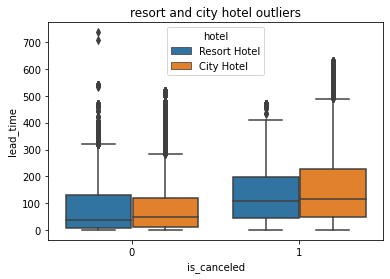

In [13]:
#Booking or Reservation Lead Time is the period of time (most typically measured in calendar days)
#between when a guest makes the reservation and the actual check-in/arrival date.

sns.boxplot(x='is_canceled',y='lead_time',hue='hotel',data=hotel_data)
plt.title('resort and city hotel outliers')
plt.show()

There are outliers in the leadtime

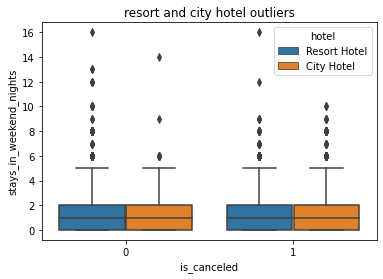

In [14]:
sns.boxplot(x='is_canceled',y='stays_in_weekend_nights',hue='hotel',data=hotel_data)
plt.title('resort and city hotel outliers')
plt.show()

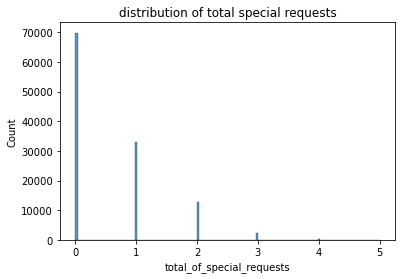

In [15]:
sns.histplot(x='total_of_special_requests',data=hotel_data)
plt.title('distribution of total special requests')
plt.show()

Till now we have explored the outliers through data visualization. detecting the outliers in the overall dataframe is the next task

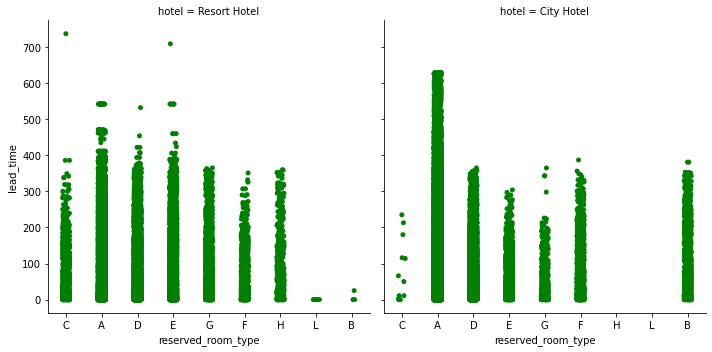

In [16]:
sns.catplot(data=hotel_data,x='reserved_room_type',y='lead_time',col='hotel',color='green')
plt.show()

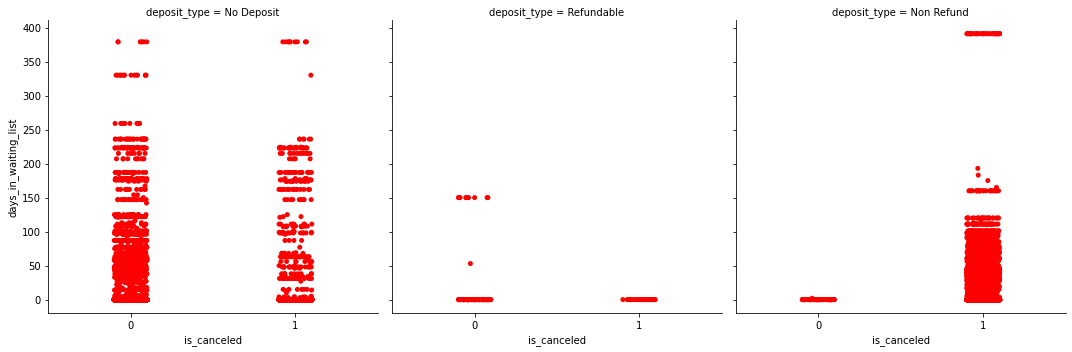

In [17]:
sns.catplot(data=hotel_data,y='days_in_waiting_list',x='is_canceled',col='deposit_type',color='red')
plt.show()

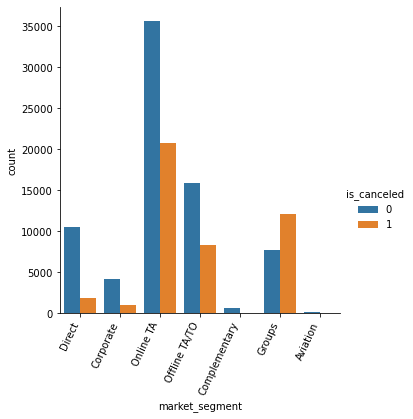

In [18]:
chart=sns.catplot(data=hotel_data, x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.show()

 # Detection of outliers

 ## Z score

In [19]:
# Assuming 'hotel_data' is your DataFrame
# You can get the column data types using dtypes
column_types = hotel_data.dtypes

# Assuming you want to separate columns into 'int_columns' and 'cat_columns' based on their data types
int_columns = column_types[column_types == 'int64'].index.tolist()
cat_columns = column_types[column_types == 'object'].index.tolist()

# Now you can use these lists to separate the columns
int_data = hotel_data[int_columns]
cat_data = hotel_data[cat_columns]


In [20]:
#calculating the z score for the entire dataframe
z = np.abs(stats.zscore(int_data))

In [21]:
threshold = 3
print(np.where(z > 3))

(array([     0,      1,      1, ..., 118694, 118714, 118725], dtype=int64), array([12,  1, 12, ..., 12, 15, 15], dtype=int64))


Detection of outliers with IQR

In [22]:
Q1 = int_data.quantile(0.25)
Q3 = int_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                         1.0
lead_time                         143.0
arrival_date_year                   1.0
arrival_date_week_number           22.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                2.0
adults                              0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64


In [23]:
#removing the outliers
hotel_data[int_data.columns] = int_data[~(int_data < (Q1 - 1.5 * IQR)) |(int_data > (Q3 + 1.5 * IQR))]

In [24]:
# le = LabelEncoder()
# hotel_data = hotel_data.apply(LabelEncoder().fit_transform)

In [25]:
hotel_data = hotel_data.drop(['reservation_status_date','country'],axis=1)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'hotel_data' with multiple columns
categorical_columns = hotel_data.select_dtypes(include=['object']).columns

label_encoders = {}  # A dictionary to store label encoders and mappings

for column_name in categorical_columns:
    le = LabelEncoder()
    le.fit(hotel_data[column_name])
    label_encoders[column_name] = {
        'encoder': le,
        'mapping': dict(zip(le.classes_, le.transform(le.classes_)))
    }

    # Print the encoder and mapping for the current column
    print(f"Column: {column_name}")
    print(f"Encoder: {le}")
    print("Mapping:")
    for key, value in label_encoders[column_name]['mapping'].items():
        print(f"{key} -> {value}")
    print("")

Column: hotel
Encoder: LabelEncoder()
Mapping:
City Hotel -> 0
Resort Hotel -> 1

Column: arrival_date_month
Encoder: LabelEncoder()
Mapping:
April -> 0
August -> 1
December -> 2
February -> 3
January -> 4
July -> 5
June -> 6
March -> 7
May -> 8
November -> 9
October -> 10
September -> 11

Column: meal
Encoder: LabelEncoder()
Mapping:
BB -> 0
FB -> 1
HB -> 2
SC -> 3
Undefined -> 4

Column: market_segment
Encoder: LabelEncoder()
Mapping:
Aviation -> 0
Complementary -> 1
Corporate -> 2
Direct -> 3
Groups -> 4
Offline TA/TO -> 5
Online TA -> 6

Column: distribution_channel
Encoder: LabelEncoder()
Mapping:
Corporate -> 0
Direct -> 1
GDS -> 2
TA/TO -> 3
Undefined -> 4

Column: reserved_room_type
Encoder: LabelEncoder()
Mapping:
A -> 0
B -> 1
C -> 2
D -> 3
E -> 4
F -> 5
G -> 6
H -> 7
L -> 8

Column: assigned_room_type
Encoder: LabelEncoder()
Mapping:
A -> 0
B -> 1
C -> 2
D -> 3
E -> 4
F -> 5
G -> 6
H -> 7
I -> 8
K -> 9
L -> 10

Column: deposit_type
Encoder: LabelEncoder()
Mapping:
No Deposit

In [27]:
# Transform the DataFrame with label-encoded values
for column_name in categorical_columns:
    hotel_data[column_name] = label_encoders[column_name]['encoder'].transform(hotel_data[column_name])

# Identify the numerical columns
numerical_columns = hotel_data.select_dtypes(exclude=['object']).columns

# Create a new DataFrame with the original numerical columns
new_hotel_data = hotel_data[numerical_columns].copy()

# Combine the transformed categorical columns with the numerical columns
for column_name in categorical_columns:
    new_hotel_data[column_name] = hotel_data[column_name]

In [28]:
for column_name, encoder_info in label_encoders.items():
    print(f"Column: {column_name}")
    encoder = encoder_info['encoder']
    mapping = encoder_info['mapping']

    print("Encoded Value -> Original Value:")
    for encoded_value, original_value in mapping.items():
        print(f"{encoded_value} -> {original_value}")

    # If you want to access the encoded values as a list:
    encoded_values = list(mapping.keys())
    print(f"Encoded Values for {column_name}: {encoded_values}")


Column: hotel
Encoded Value -> Original Value:
City Hotel -> 0
Resort Hotel -> 1
Encoded Values for hotel: ['City Hotel', 'Resort Hotel']
Column: arrival_date_month
Encoded Value -> Original Value:
April -> 0
August -> 1
December -> 2
February -> 3
January -> 4
July -> 5
June -> 6
March -> 7
May -> 8
November -> 9
October -> 10
September -> 11
Encoded Values for arrival_date_month: ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
Column: meal
Encoded Value -> Original Value:
BB -> 0
FB -> 1
HB -> 2
SC -> 3
Undefined -> 4
Encoded Values for meal: ['BB', 'FB', 'HB', 'SC', 'Undefined']
Column: market_segment
Encoded Value -> Original Value:
Aviation -> 0
Complementary -> 1
Corporate -> 2
Direct -> 3
Groups -> 4
Offline TA/TO -> 5
Online TA -> 6
Encoded Values for market_segment: ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA']
Column: distribution_channel
Encoded Value -> 

In [29]:
#seperating the features and targets
X = hotel_data.drop(['is_canceled','adults'],axis=1)
y = hotel_data['is_canceled']
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Feature selection methods

1.Univariate feature selection

In [30]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your feature matrix and y is your target variable
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_scaled, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['columns', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  # print 10 best features


                        columns         Score
25           reservation_status  19114.419003
19                 deposit_type  11676.501752
1                     lead_time   1499.813143
24    total_of_special_requests   1452.621855
0                         hotel   1432.351107
17           assigned_room_type    956.289845
13            is_repeated_guest    814.002623
23  required_car_parking_spaces    543.736489
14       previous_cancellations    453.169004
18              booking_changes    259.185192


In [31]:
#creating new dataframe with univariate feature selection menthod
# univariate_data = hotel_data[featureScores.nlargest(10,'Score').columns]
univariate_data = hotel_data[featureScores.nlargest(10,'Score')['columns'].tolist()]

In [32]:
#splitting the data
X_train_uni,X_test_uni,y_train_uni,y_test_uni = train_test_split(univariate_data,y)


2.Correlation matrix with heatmap

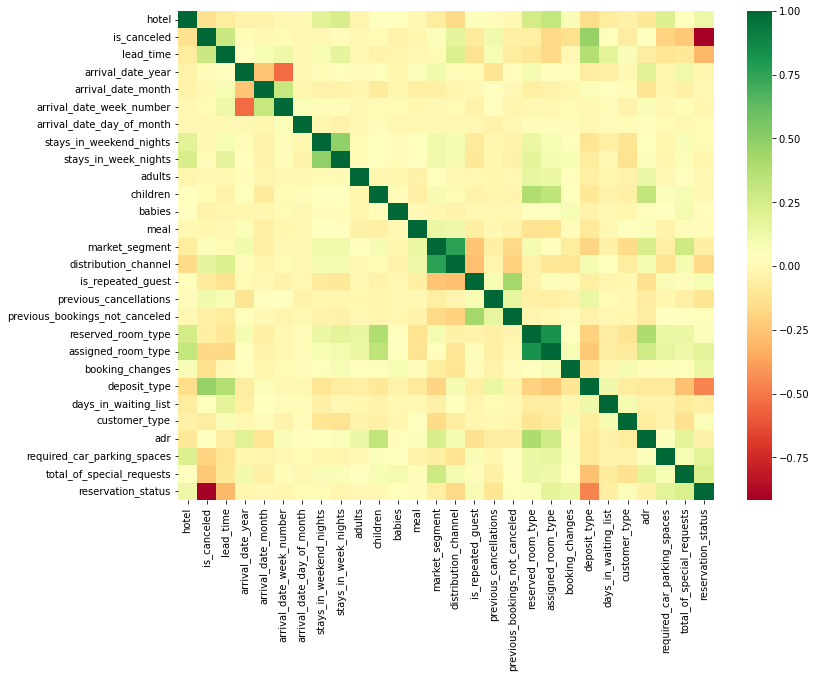

In [33]:
data_corr = hotel_data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(data_corr,cmap="RdYlGn")
plt.show()


3.Feature importance

In [34]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

[4.91324803e-03 2.02322392e-02 3.18476715e-03 1.61235183e-03
 2.22593191e-03 1.62302434e-03 1.51120694e-03 1.74043448e-03
 9.42532744e-04 1.16339931e-04 1.63799979e-03 1.04200473e-02
 8.77900686e-03 2.17781583e-03 6.26108178e-03 2.33363245e-04
 2.98210926e-03 6.80792783e-03 2.98350533e-03 9.23690659e-02
 1.11846232e-03 6.65643008e-03 3.12829098e-03 8.14935728e-03
 1.42922507e-02 7.93901209e-01]


In [35]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)



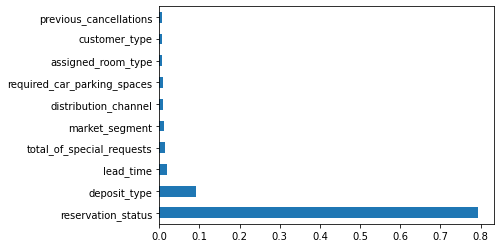

In [36]:
# Number of top features to display
top_n = 10

# Get the top N important features
top_features = feat_importances.nlargest(top_n)

# Plot the bar graph
top_features.plot(kind='barh')
plt.show()

# Print the column names of the top N features
top_feature_names = top_features.index.tolist()


In [37]:
hotel_data_imp = X[top_feature_names]

In [38]:
top_feature_names

['reservation_status',
 'deposit_type',
 'lead_time',
 'total_of_special_requests',
 'market_segment',
 'distribution_channel',
 'required_car_parking_spaces',
 'assigned_room_type',
 'customer_type',
 'previous_cancellations']

In [39]:
hotel_data_imp.describe()

,reservation_status,deposit_type,lead_time,total_of_special_requests,market_segment,distribution_channel,required_car_parking_spaces,assigned_room_type,customer_type,previous_cancellations
count,118728.000000,118728.000000,118728.000000,118728.000000,118728.00000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000
mean,0.648491,0.125472,104.401312,0.571778,4.93534,2.591436,0.061915,1.318729,2.137541,0.087208
std,0.498197,0.335348,106.915284,0.792740,1.26070,0.901190,0.244230,1.863332,0.577906,0.846419
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,0.000000,4.00000,3.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,0.000000,70.000000,0.000000,5.00000,3.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,0.000000,161.000000,1.000000,6.00000,3.000000,0.000000,3.000000,2.000000,0.000000
max,2.000000,2.000000,737.000000,5.000000,6.00000,4.000000,8.000000,10.000000,3.000000,26.000000


In [40]:
X_train_imp,X_test_imp,y_train_imp,y_test_imp = train_test_split(hotel_data_imp,y,train_size=0.8, random_state=42)

# Machine learning models

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg=LogisticRegression()

log_reg.fit(X_train_imp,y_train_imp)

LogisticRegression()

In [43]:
test_pred=log_reg.predict(X_test_imp)
train_pred=log_reg.predict(X_train_imp)

In [44]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_imp,test_pred)

array([[14757,    22],
       [  241,  8726]], dtype=int64)

In [45]:
# recall

from sklearn.metrics import recall_score

recall_score(y_test_imp,test_pred)

0.9731236756997881

In [46]:
# precision

from sklearn.metrics import precision_score

precision_score(y_test_imp,test_pred)

0.9974851394604481

In [47]:
# accuracy

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train_imp,train_pred))  # train accuracy
print(accuracy_score(y_test_imp,test_pred))  # test accuracy

0.989197953296414
0.9889244504337573


In [48]:
# f1-score

from sklearn.metrics import f1_score

f1_score(y_test_imp,test_pred)

0.9851538244425629

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=10)

d_tree.fit(X_train_imp,y_train_imp)

d_tree_test_pred=d_tree.predict(X_test_imp)
d_tree_train_pred=d_tree.predict(X_train_imp)

In [50]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_imp,d_tree_test_pred)

array([[14779,     0],
       [    0,  8967]], dtype=int64)

In [51]:
from sklearn.metrics import recall_score

recall_score(y_test_imp,d_tree_test_pred)

1.0

In [52]:
from sklearn.metrics import f1_score 

f1_score(y_test_imp,d_tree_test_pred)

1.0

In [53]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train_imp,d_tree_train_pred)) # Train accuracy
print(accuracy_score(y_test_imp,d_tree_test_pred)) # Test accuracy

1.0
1.0


# Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_c=RandomForestClassifier(n_estimators=80)

rf_c.fit(X_train_imp,y_train_imp)
rf_test_pred=rf_c.predict(X_test_imp)
rf_train_pred=rf_c.predict(X_train_imp)


In [55]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_imp,rf_test_pred)

array([[14779,     0],
       [    0,  8967]], dtype=int64)

In [56]:
from sklearn.metrics import recall_score

recall_score(y_test_imp,rf_test_pred)

1.0

In [57]:
from sklearn.metrics import f1_score 

f1_score(y_test_imp,rf_test_pred)

1.0

In [58]:
from sklearn.metrics import accuracy_score

print('Train Score:',accuracy_score(y_train_imp,rf_train_pred))
print('Test Score:',accuracy_score(y_test_imp,rf_test_pred))

Train Score: 1.0
Test Score: 1.0


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have features X and labels y


classifiers = {'Logistic Regression': log_reg,
               'Decision Tree': d_tree,
               'Random Forest': rf_c}

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_imp, y_train_imp)
    
    # Make predictions
    y_pred = clf.predict(X_test_imp)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_imp, y_pred)
    
    # Generate classification report
    report = classification_report(y_test_imp, y_pred, output_dict=True)
    
    # Extract precision, recall, and F1 score for each class
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Add results to the DataFrame
    results_df = results_df.append({'Classifier': clf_name,
                                    'Accuracy': accuracy,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'F1 Score': f1},
                                   ignore_index=True)

# Print the results DataFrame
print(results_df)

            Classifier  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.988924   0.989049  0.988924  0.988897
1        Decision Tree  1.000000   1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000
